# Jacobi stencil

<details>
<summary>License</summary>
<pre>

Copyright 2023 NVIDIA Corporation

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

     http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
</pre>
</details>

To get started, `import cunumeric as np` (just the same way we would import `numpy`)


In [1]:
import cunumeric as np  # instead of numpy

In [2]:
# Because of Legate's deferred execution model, legate.timing should be used instead
# of standard Python datetime utilities. Python datetime.now would return the time
# a task is *scheduled*, not necessarily the time a task finishes executing.
from legate.timing import time

In [3]:
def jacobi(grid, I): 
    print("Running Jacobi stencil... ", end="")
    
    center = grid[1:-1, 1:-1]
    north = grid[0:-2, 1:-1]
    east = grid[1:-1, 2:]
    west = grid[1:-1, 0:-2]
    south = grid[2:, 1:-1]

    start = time()
    for i in range(I):
        average = center + north + east + west + south
        center[:] = 0.2 * average
    stop = time()

    print(f"Elapsed Time: {(stop - start)/1000} ms")
    
    return grid

We also want to define a small helper function `make_grid` to generate a test grid for us to use

In [4]:
def make_grid(N):
    grid = np.zeros((N + 2, N + 2))
    grid[:, 0] = -273.15
    grid[:, -1] = -273.15
    grid[-1, :] = -273.15
    grid[0, :] = 40.0
    return grid

Let's first create a grid using `make_grid`, and see what it looks like using Matplotlib's `pcolor` function

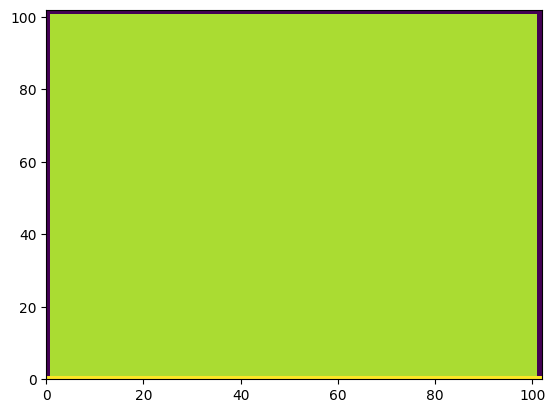

In [5]:
import matplotlib.pyplot as plt

G = make_grid(100)

plt.pcolor(G);

As we can see it produces a two dimensional array of zeros with some different values on the boundaries. Now let's run 1000 iterations of our Jacobi stencil on this image and look at the result.

Running Jacobi stencil... Elapsed Time: 2461.875 ms


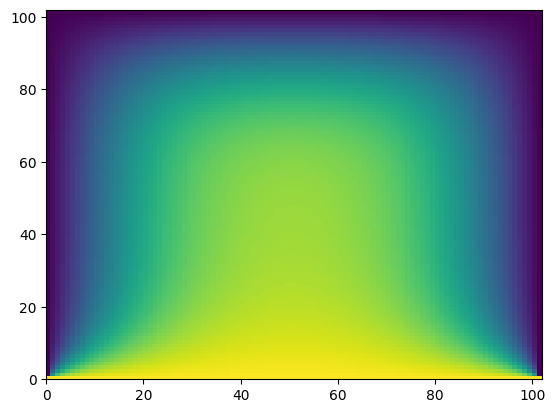

In [6]:
G = jacobi(G, 1000)

plt.pcolor(G);

We can see that the effect of running the stencil over the image repeatedly is to average out all the pixels.